In [7]:
import pandas as pd
#reads csv
data = pd.read_csv("VRAJ.csv")
data.head()



,sr_no,car_age,years_of_maintainance
0,1,12,5
1,2,15,3
2,3,8,8
3,4,20,2
4,5,5,10


<Axes: xlabel='car_age', ylabel='years_of_maintainance'>

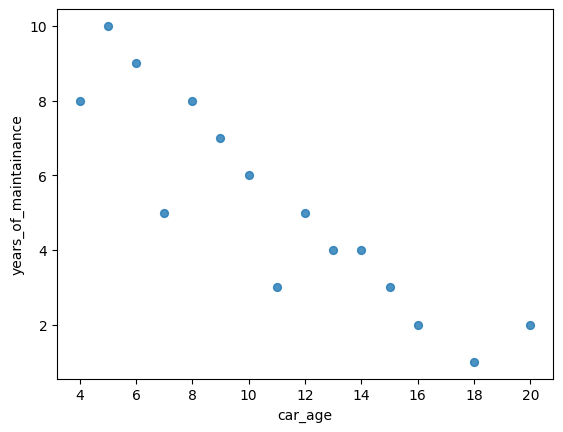

In [10]:
from matplotlib import pyplot as plt
## Create a scatter plot using the data DataFrame
data.plot(kind='scatter', x='car_age', y='years_of_maintainance', s=32, alpha=.8)


In [11]:
# Return the predicted y value given input X, weight, and bias
def predict_y(X, weight, bias):
    return weight*X + bias

In [12]:
def cost_function(X, y, weight, bias):
    # Calculate the mean squared error (MSE) cost
    totalrecords = len(X)
    total_error = 0.0
    for i in range(totalrecords):
        # Accumulate the squared error for each record
        total_error += (y[i] - (weight*X[i] + bias))**2
        # Return the mean squared error
    return total_error / totalrecords

In [13]:

def update_weights(X, y, weight, bias, learning_rate):
    # Update the weights and bias using gradient descent
    weight_deriv = 0  # Initialize weight derivative
    bias_deriv = 0  # Initialize bias derivative
    totalrecords = len(X)  # Total number of records

    for i in range(totalrecords):
        # Calculate the partial derivative of the cost function with respect to weight
        # -2x(y - (mx + b))
        weight_deriv += -2*X[i] * (y[i] - (weight*X[i] + bias))
        # Calculate the partial derivative of the cost function with respect to bias
        # -2(y - (mx + b))
        bias_deriv += -2*(y[i] - (weight*X[i] + bias))

   # Update the weight and bias using the derivatives and learning rate
    weight -= (weight_deriv / totalrecords) * learning_rate
    bias -= (bias_deriv / totalrecords) * learning_rate

    return weight, bias

In [14]:
# Train the model using gradient descent for a specified number of iterations
def train(X, y, weight, bias, learning_rate, iters):
    cost_history = []  # List to store the cost at each iteration

    for i in range(iters):
        # Update weights and bias
        weight,bias = update_weights(X, y, weight, bias, learning_rate)

        # Calculate the cost with the updated weights and bias
        cost = cost_function(X, y, weight, bias)
        cost_history.append(cost)

# Print the cost every 10 iterations       
        if i % 10 == 0:
            print("iter={:d}    weight={:.2f}    bias={:.4f}    cost(MSE)={:.2}".format(i, weight, bias, cost))

    
    return weight, bias 

In [16]:

# Prepare data for training
X = data['car_age'].values  # Extract 'car_age' values as input feature
y = data['years_of_maintainance'].values  # Extract 'years_of_maintainance' values as target
weight = 0  # Initialize weight to 0
bias = 0  # Initialize bias to 0
lr = 0.01  # Set learning rate
iters = 100  # Set number of iterations

# Train the model and get the learned weight and bias
weight, bias = train(X, y, weight, bias, lr, iters)
print("The weight and bias learnt are::  weight={:f}    bias={:.4f}".format(weight, bias))


iter=0    weight=0.93    bias=0.1027    cost(MSE)=7.5e+01
iter=10    weight=509.99    bias=39.2259    cost(MSE)=3.9e+07
iter=20    weight=423013.25    bias=32247.6846    cost(MSE)=2.7e+13
iter=30    weight=351065536.56    bias=26762331.7874    cost(MSE)=1.8e+19
iter=40    weight=291355144675.78    bias=22210504764.6583    cost(MSE)=1.3e+25
iter=50    weight=241800494629933.72    bias=18432868394176.1406    cost(MSE)=8.7e+30
iter=60    weight=200674263941307040.00    bias=15297744957011596.0000    cost(MSE)=6e+36
iter=70    weight=166542919070605475840.00    bias=12695853719854686208.0000    cost(MSE)=4.1e+42
iter=80    weight=138216746621134226587648.00    bias=10536500780271564488704.0000    cost(MSE)=2.8e+48
iter=90    weight=114708383599495775061540864.00    bias=8744417755778450334941184.0000    cost(MSE)=2e+54
The weight and bias learnt are::  weight=-48610065289076005173096087552.000000    bias=-3705629045453782881941848064.0000    


In [19]:
# Calculate the predicted years of maintenance
d=int(input('Enter the number of components for which you need prediction related to how many  years of maintainece it would need '))

years=predict_y(d, weight, bias)
print('It would need ')
print(years)   

It would need 
-4.898062819362138e+29


In [18]:
5


5